In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## NLTK Libraries

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer
from nltk.corpus import  stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
import spacy
from nltk.corpus import  stopwords
import string
import contractions
import re

In [2]:
! pip install contractions

In [3]:
df = pd.read_excel("/Users/juhimishra/Downloads/Rating & review - scrap.xlsx")
df.head()

,Rating,Review
0,1,Useless product
1,1,Don't waste your money
2,1,Very poor
3,1,Useless product
4,1,Hated it!


There are 2 column one is Rating and the other one is Review column. In rating starts given by customer based on review been updated.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17275 entries, 0 to 17274
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  17275 non-null  int64 
 1   Review  17275 non-null  object
dtypes: int64(1), object(1)
memory usage: 270.0+ KB


Rating is integer data type while review is object datatype

In [5]:
df.isna().sum()

Rating    0
Review    0
dtype: int64

There is no missing data in any of the row or column

In [6]:
df['Rating'].value_counts()

5    3456
4    3455
3    3455
2    3455
1    3454
Name: Rating, dtype: int64

Almost all the ratings do have same number of data in it . No imbalance problem statement. As in classification problem we need 
to check whether the problem statement is imbalanced or not

<AxesSubplot:xlabel='Rating', ylabel='count'>

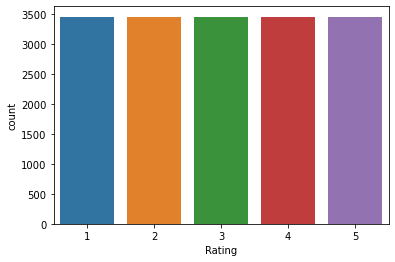

In [7]:
sns.countplot(df.Rating)

As all the ratings do have equal number of data so we are getting all the bar plot on same scale which is within 3000 to 3500.

In [8]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/juhimishra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/juhimishra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Preprocessing NLTK data

### Lower case Cnversion

In [10]:
df['Review']=df['Review'].apply(lambda x: x.lower())

In [11]:
contractions = {"Don't":"do not",
                "don't":"do not"
                }

In [12]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key,value)
        return x
    else:
        return x

In [13]:
df["Review"]=df["Review"].apply(lambda x:cont_to_exp(x))

#### Special character or punctuation removal

In [14]:
df['Review']=df['Review'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '',x))

#### Remove multiple spaces

In [15]:
df['Review']=df['Review'].apply(lambda x: " ".join(x.split()))

#### Remove Stopwords

In [16]:
from wordcloud.wordcloud import STOPWORDS
df['Review']=df['Review'].apply(lambda x: " ".join([t for t in x.split() if t not in STOPWORDS]))

In [17]:
from nltk.stem import wordnet
from nltk.tokenize import word_tokenize
lemma = wordnet.WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/juhimishra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

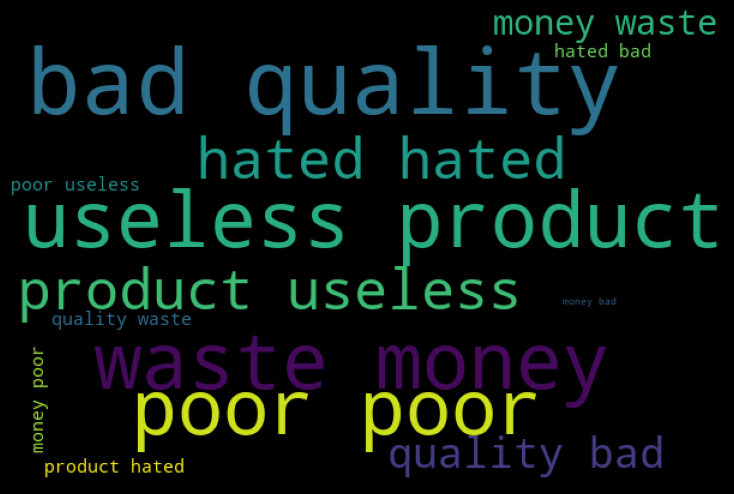

In [20]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = df['Review'][df['Rating']]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=100).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Using word cloud we can have visualisation of which words are more im. Here we can see that bad quality , useless product are larger in size which means these words are having high value while money poor, product hated useless all these words are too small which means they do less value in this dataset.


### Tokenize

In [21]:
from nltk.tokenize import word_tokenize

In [22]:
#object of WordNetLemmatizer
lm = WordNetLemmatizer()

In [23]:
df['Review']=df['Review'].apply(str)

df["tokenized_text"] = df["Review"].apply(nltk.word_tokenize)

new_stopwords_list = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','!','@','#','$','%','^','&','*','(',')'])

def lemmatize_text(text):

    return [lm.lemmatize(w) for w in text if w not in new_stopwords_list]

df['Lemmatized_Text'] = df['tokenized_text'].apply(lemmatize_text).apply(', '.join)
    

In [24]:
df.head()

,Rating,Review,tokenized_text,Lemmatized_Text
0,1,useless product,"[useless, product]","useless, product"
1,1,waste money,"[waste, money]","waste, money"
2,1,poor,[poor],poor
3,1,useless product,"[useless, product]","useless, product"
4,1,hated,[hated],hated


Lemmatization to bring all the word to it;s base form . Lemmatization in other we call it as lemma

In [25]:
cv = TfidfVectorizer(stop_words='english',

    sublinear_tf=True,

    strip_accents='unicode',

    analyzer='word',

    token_pattern=r'\w{2,}',  #vectorize 2-character words or more

    ngram_range=(1, 1))

# Use the content column instead of our single text variable

traindata = cv.fit_transform(df['Lemmatized_Text'])


To convert all the string datatype to numbers used Tfidf. This is one of the statistical analysis used to convert string to number 

In [26]:
cv.get_feature_names()

['10',
 '100',
 '108',
 '13k',
 '1st',
 '22mk600m',
 '22mp68vq',
 '2730u',
 '30',
 '40',
 '41',
 '43',
 '4a',
 '4k',
 '4x',
 '50',
 '5ghz',
 '615',
 '6kg',
 '7kg',
 '9999',
 'aadmi',
 'aam',
 'able',
 'absolute',
 'adsl',
 'adsl2',
 'affordable',
 'amazing',
 'android',
 'apps',
 'asdl',
 'asus',
 'attachment',
 'audio',
 'auto',
 'automatic',
 'average',
 'avg',
 'away',
 'awesome',
 'bad',
 'band',
 'bang',
 'bangalore',
 'basic',
 'bass',
 'beauty',
 'best',
 'better',
 'beware',
 'bhk',
 'black',
 'blowing',
 'box',
 'brand',
 'brilliant',
 'broadband',
 'brodcasting',
 'broken',
 'bsnl',
 'buck',
 'budget',
 'buggy',
 'build',
 'buy',
 'buying',
 'cable',
 'catch',
 'center',
 'challenge',
 'channel',
 'charm',
 'cheap',
 'cheaper',
 'cheat',
 'cheated',
 'cheater',
 'cheep',
 'choice',
 'clarity',
 'class',
 'classy',
 'clean',
 'clear',
 'cm',
 'cm40',
 'cockroach',
 'compatibility',
 'complaint',
 'complicated',
 'condition',
 'connecting',
 'connection',
 'connectivity',
 'con

### Splitting data into x and y in which x is for training purpose and y for testing purpose

In [27]:
x = traindata
y = df.Rating

In [38]:
traindata.shape

(17275, 435)

In [39]:
y.shape

(17275,)

### Scaling all the features

In [33]:
x.ndim

2

In [34]:
y.ndim

1

In [35]:
x.shape

(17275, 435)

In [36]:
y.shape

(17275,)

In [41]:
sc = StandardScaler(with_mean=False)
X_train_sc = sc.fit(x)
X_train = X_train_sc.transform(x)


### Machine Learning Algorithm

In [44]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


In [62]:
# Importing metrices
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,accuracy_score

In [46]:
x_train,x_test,y_train,y_test=train_test_split(X_train,y,random_state=0,test_size=0.25)

In [49]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
pred =rfc.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       874
           2       0.78      0.98      0.87       845
           3       1.00      0.82      0.90       873
           4       0.92      0.87      0.89       874
           5       0.95      0.93      0.94       853

    accuracy                           0.92      4319
   macro avg       0.93      0.92      0.92      4319
weighted avg       0.93      0.92      0.92      4319



For rating 1 all the precision , recall and f1-score is 99% which means score for rating 1 is really good. While for Rating 2 precision score is too low which is 78% compare to recall which is 98% because of which f1 score shows 87%,  as f1 score is the combination of both false positive and false negative where precision is having false positive and recall is having false negative. Formula of f1 score is 2*(precision * Recall)/Precison + Recall. Similarly for rating 3 we can see that false positive which is precision is having 100% while recall which basically have focus on false negative is 82% and the avg of both which is f1 score is 90%. In this problem statement recall score is much helpful compare to precision because here we need rating prediction and if false positive will be higher will not able to identify genuine rating of customers how many are satisfied and how many are dissatisfied. For rating 4 precision score is 92% while recall is 87% and avg of both is 89%. While for rating 5 there are not much difference between scores of precision recall and f1 score . As we can see that false positive(precision) score is 95% while false negative score (recall) is 93% . F1 score for the same is 94% which is multiplication of 2(p*r)/(p+r). Overall accuracy score we got as 92% . 

In [53]:
print(cross_val_score(rfc,x,y,cv=5).mean())

0.9165267727930535


cross validation score on total 5 foldings is 91.65% which is less than accuracy score

In [50]:
sgd = SGDClassifier()
sgd.fit(x_train,y_train)
pred =sgd.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       874
           2       0.99      0.82      0.90       845
           3       0.79      0.98      0.87       873
           4       0.91      0.88      0.89       874
           5       0.97      0.93      0.95       853

    accuracy                           0.92      4319
   macro avg       0.93      0.92      0.92      4319
weighted avg       0.93      0.92      0.92      4319



From above classification report we came across each rating precision, recall, f1 and accuracy score. Here rating 1 is having all 99% means false positive, false negative and average of all which is f1 score are equal. Having false positive report high for this problem statement will not give us accurate report . Because if will get high false positive then most of the rating will be shown as positive result which will not be helpful in identifying the dissatisfied customer. Rating 2 precision score is 99% (false positive) and recall is 82% (false negative) . Overall combination of both which is f1 score is 90%. For rating 3 precision score is 79% while recall is pretty high which 98% means here the possibility to have false negative is high. And so the f1 score affected and showing including both false positive and negative report is 87%. For rating 4 precision score is 91% while recall score is 88% while f1 score is 89%. For rating 5 precision score is 97% while recall is 93% and f1 score is 95%. Over all we can say that rating 3 is having huge difference between precision and recall in which recall score is high which means possibility of getting false negative options will be high. Overall Rating 5 doesn’t have much fluctuation in score. While overall accuracy score is 92% which is almost equal to random forest classifier. While CV score for this algorithm is 91.97%  

In [54]:
print(cross_val_score(sgd,x,y,cv=5).mean())

0.9197684515195368


Not much difference between accuracy score which is our classification metrics and CV score. Only 0.25% difference we observe.In which accuracy score is having higher score compare to CV score which validated upon 5 foldings

In [51]:
svc = LinearSVC()
svc.fit(x_train,y_train)
pred =svc.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       874
           2       0.78      0.98      0.87       845
           3       0.99      0.82      0.90       873
           4       0.92      0.87      0.89       874
           5       0.96      0.94      0.95       853

    accuracy                           0.92      4319
   macro avg       0.93      0.92      0.92      4319
weighted avg       0.93      0.92      0.92      4319



Here precision score is 100% while recall and f1 score is 99%. Which means both the false positive and false negative reports are almost equal which in result f1 score too are equal to recall which is false negative. For rating 2 precision score is 78% which is comparatively too low compare to recall which is 98% means here false negative is high. So f1 score which mostly affected by recall score is 87% . If recall score is high then f1 score will also shows high score because of giving much importance to recall and of bias nature. Rating 3 precious score is 99% while recall is 82% , f1 score is 90% which is average of precision and recall means including both false positive and false negative score is been given. But as in rating 2 we seen that due to recall high score f1 score increased but in rating 3 precision score is high but that not affected much the f1 score because of f1 score mostly rely on recall score. Rating 4 precision score is 92% and recall is 87% and overall f1 score is 89% which is near to recall score. While Rating 5 precision is 96%, recall is 94% and f1 score is 95%. Overall the score of Rating 5 is balanced compare to all other ratings. Overall accuracy score for all the three algorithm are same which is 92%.

In [55]:
print(cross_val_score(svc,x,y,cv=5).mean())

0.917452966714906


CV score got as 91.74% trained on 5 foldings. Not having much difference between CV score and accuracy score.

Overall SGD is a best performing model with less difference between CV and accuracy score.

### Hyperparameter Tuning

In [64]:
# SGD Algorithm
param = {'penalty' :['l2', 'l1', 'elasticnet'],
        'alpha':[0.001,0.002,0.004],
        'l1_ratio':[0.15,0.20,0.30],
        'max_iter':[100,200,500]}

In [65]:
GC = GridSearchCV(sgd,param,cv=5)

In [66]:
GC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [0.001, 0.002, 0.004],
                         'l1_ratio': [0.15, 0.2, 0.3],
                         'max_iter': [100, 200, 500],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [67]:
GC.best_params_

{'alpha': 0.002, 'l1_ratio': 0.2, 'max_iter': 200, 'penalty': 'l1'}

In [68]:
final_sgd = SGDClassifier(alpha=0.02,l1_ratio=0.2,max_iter =200, penalty='l1' )
final_sgd.fit(x_train,y_train)
pred = final_sgd.predict(x_test)
acc = accuracy_score(pred,y_test)
print(acc*100)

91.75735123871267


Did hyperparameter using 4 parameters which is penalty, alpha, l1 ratio and max iteration. Provided to each parameter 3 values on which I was suppose to train the model. One by one using each value the model get trained and will provide accuracy score. After training got best parameters and used the same on my best performing algorithm which is SGD and predicted the score . As a result got 91.75% . Means score has not improved . Even 0.25% score been reduced. Here might be chance that if we increase the parameter and values inside that we can have much better score. 


### Saving the model

In [69]:
import joblib
joblib.dump(final_sgd,'Finalmodelrating and review.pk1')

['Finalmodelrating and review.pk1']

In [71]:
# prediction using the same model
loaded_model = joblib.load(open('Finalmodelrating and review.pk1', 'rb'))

In [72]:
prediction=loaded_model.predict(x_test)
prediction=pd.DataFrame(prediction)
prediction

,0
0,4
1,1
2,4
3,4
4,3
...,...
4314,3
4315,3
4316,2
4317,3


Based on 25% test dataset that we did during training of model prediction the rating